### Loan Classification Case study

This case study addresses a very common problem in the Banking industry. "To approve or reject this loan application?". The bank executives rely on extensive background checks to take the decision.

In below case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios. You can use this flow as a template to solve any supervised ML classification problem.

The flow of the case study is as below:

- Reading the data in python
- Defining the problem statement
- Identifying the Target variable
- Looking at the distribution of Target variable
- Basic Data exploration
- Rejecting useless columns
- Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
- Feature Selection based on data distribution
- Outlier treatment
- Missing Values treatment
- Visual correlation analysis
- Converting data to numeric for ML
- Sampling and K-fold cross validation
- Trying multiple classification algorithms
- Selecting the best Model
- Deploying the best model in production

Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

It has one file "Loan_Approval_Data.csv". This file contains the historical data of approvals and rejections of various applications.

The goal is to learn from this data and predict if a given loan application will be approved or rejected!

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
LoanData=pd.read_csv('D://Nithya//Loan_Approval_Data.csv', encoding='latin')
print('Shape before deleting duplicate values:', LoanData.shape)

# Removing duplicate rows if any
LoanData=LoanData.drop_duplicates()
print('Shape After deleting duplicate values:', LoanData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
LoanData.head(10)

Shape before deleting duplicate values: (614, 13)
Shape After deleting duplicate values: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


**Defining the problem statement:**

Create a Predictive model which can tell weather to approve a loan application or not?

- Target Variable: Loan_Status

- Predictors: Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome etc.

- Loan_Status="N" means the loan was rejected.
- Loan_Status="Y" means the loan was approved.

**Determining the type of Machine Learning**

Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

**Looking at the distribution of Target variable**

If target variable's distribution is too skewed then the predictive modeling will not be possible.

Bell curve is desirable but slightly positive skew or negative skew is also fine

When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

<Axes: xlabel='Loan_Status'>

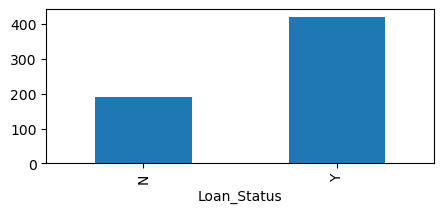

In [3]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=LoanData.groupby('Loan_Status').size()
GroupedData.plot(kind='bar', figsize=(5,2))

**Basic Data Exploration**

This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, Does this column affect the approval or rejection of loan? If the answer is a clear "No" the remove the column immediately from the data otherwise keep the column for further analysis.

In this data "Loan_ID" is one such column which is useless to us because it does not affect the approval or rejection of a loan. Hence, we will remove "Loan_ID" from the data.

There are four commands which are used for Basic data exploration in Python

- head() : This helps to see a few sample rows of the data
- info() : This provides the summarized information of the data
- describe() : This provides the descriptive statistical details of the data
- nunique(): This helps us to identify if a column is categorical or continuous

In [4]:
# Looking at sample rows in the data
LoanData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Looking at the descriptive statistics of the data
LoanData.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [7]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
LoanData.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

Loan_ID: Qualitative. Rejected. This column does not affect the loan approval or rejection.

Gender: Categorical. Selected. Missing value treatment required.

Married: Categorical. Selected. Missing value treatment required.

Dependents: Categorical. Selected. Missing value treatment required.

Education: Categorical. Selected.

Self_Employed: Categorical. Selected.

ApplicantIncome: Quantitative. Selected. Missing value treatment required.

CoapplicantIncome: Quantitative. Selected.

LoanAmount: Quantitative. Selected. Missing value treatment required.

Loan_Amount_Term: Categorical. Selected. Missing value treatment required.

Credit_History: Categorical. Selected. Missing value treatment required.

Property_Area: Categorical. Selected.

Loan_Status: Categorical. Selected. This is the Target Variable!

**Removing useless variables from data**

Based on the above report, removing "Loan_ID" column from the data

In [8]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['Loan_ID']
LoanData = LoanData.drop(UselessColumns,axis=1)
LoanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Visual Exploratory Data Analysis**

- Categorical variables: Bar plot
- Continuous variables: Histogram

Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted eight categorical predictors in the data

Categorical Predictors: 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'

We use bar charts to see how the data is distributed for these categorical columns.

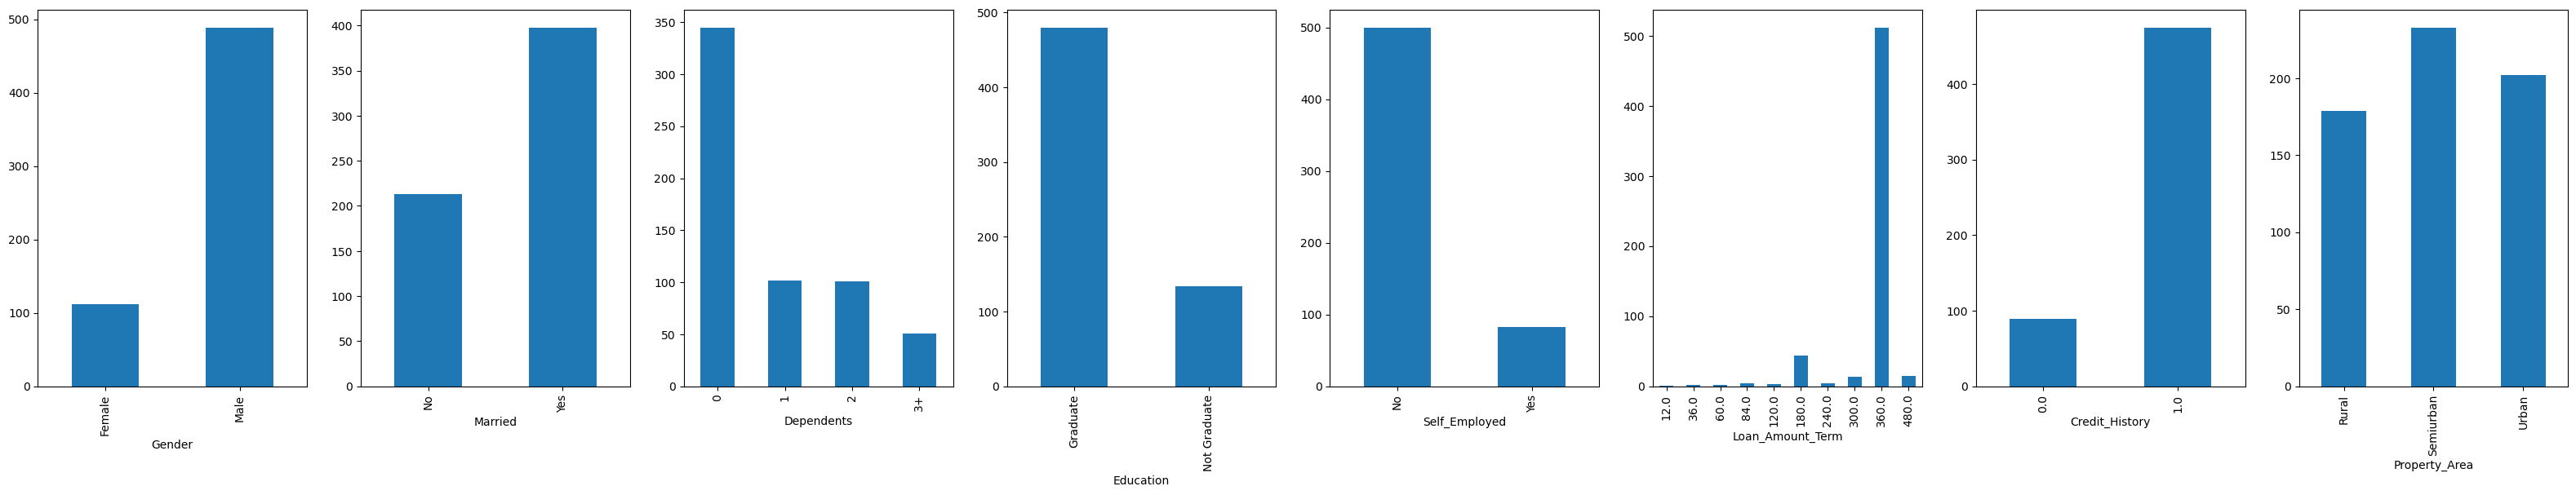

In [9]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#####################################################################
# Calling the function
PlotBarCharts(inpData=LoanData, colsToPlot=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'])

**Bar Charts Interpretation**

These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

The ideal bar chart looks like the chart of "Property_Area" column. Where each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution like "Loan_Amount_Term" where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns except "Loan_Amount_Term" have satisfactory distribution for machine learning.

Selected Categorical Variables: All the categorical variables are selected.

'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'

**Visualize distribution of all the Continuous Predictor variables in the data using histograms**

Based on the Basic Data Exploration, Three continuous predictor variables 'ApplicantIncome', 'CoapplicantIncome',and 'LoanAmount'.

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>, <Axes: >]], dtype=object)

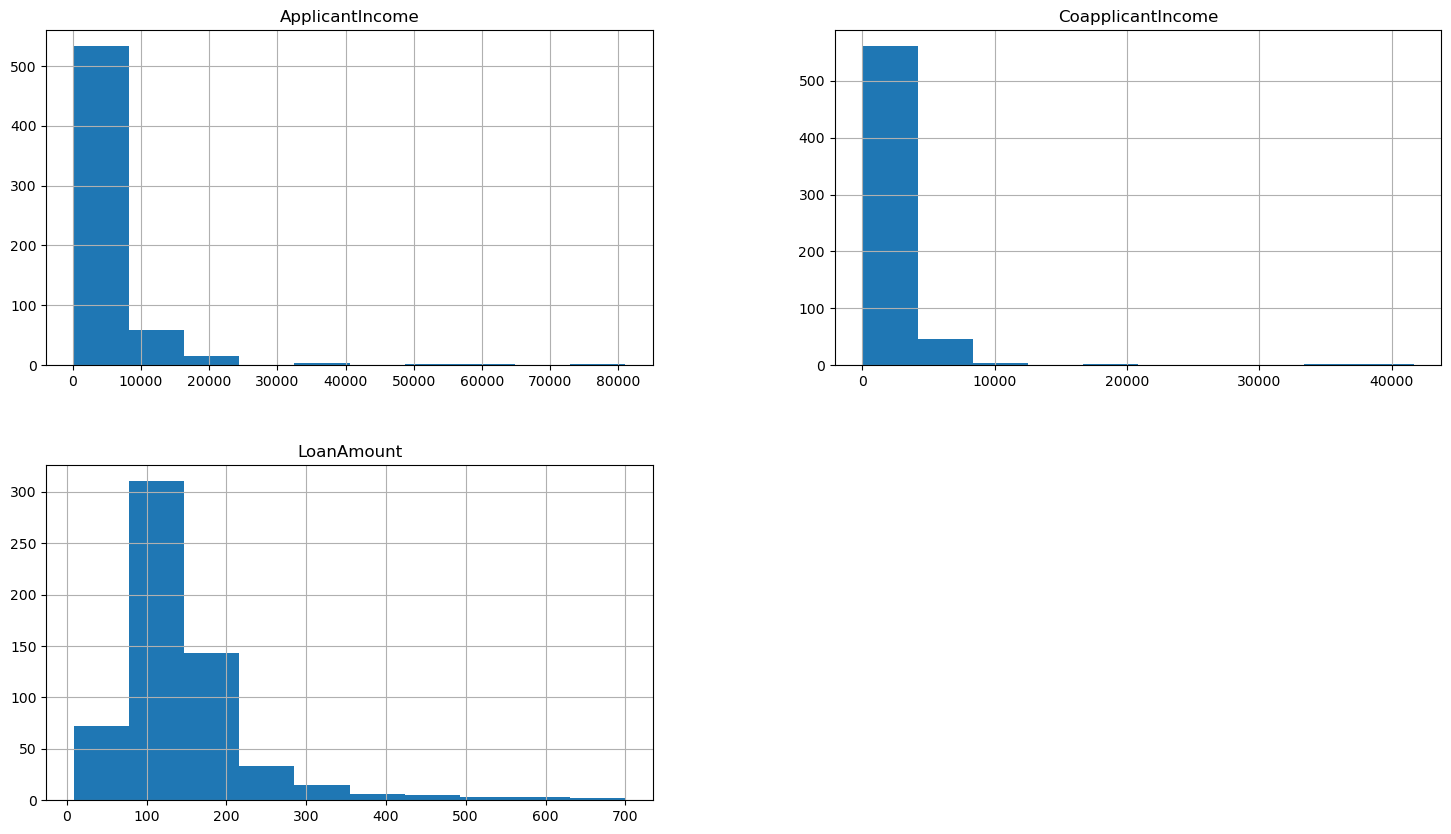

In [10]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
LoanData.hist(['ApplicantIncome', 'CoapplicantIncome','LoanAmount'], figsize=(18,10))

**Histogram Interpretation**

Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "LoanAmount", there are around 320 rows in data that has a Loan Amount between 90 to 150.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

**Selected Continuous Variables:**

- ApplicantIncome : Selected. Outliers seen beyond 30000, need to treat them.
- CoapplicantIncome: Selected. Outliers seen beyond 15000, need to treat them.
- LoanAmount: Selected. Slightly skewed distribution, acceptable.

**Outlier treatment**

Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

**Why I should treat the outliers?**

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

Option-1: Delete the outlier Records. Only if there are just few rows lost.

Option-2: Impute the outlier values with a logical business value
Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

**Replacing outliers for 'ApplicantIncome'**

In [11]:
# Finding nearest values to 30000 mark
LoanData['ApplicantIncome'][LoanData['ApplicantIncome']>20000].sort_values()

130    20166
308    20233
284    20667
506    20833
126    23803
183    33846
443    37719
185    39147
155    39999
171    51763
333    63337
409    81000
Name: ApplicantIncome, dtype: int64

Above result shows the nearest logical value is 23803, hence, replacing any value above 30000 with it.

In [12]:
# Replacing outliers with nearest possibe value
LoanData['ApplicantIncome'][LoanData['ApplicantIncome']>30000] = 23803

**Replacing outliers for 'CoapplicantIncome'**

In [13]:
# Finding nearest values to 15000 mark
LoanData['CoapplicantIncome'][LoanData['CoapplicantIncome']>10000].sort_values()

9      10968.0
177    11300.0
402    20000.0
417    20000.0
581    33837.0
600    41667.0
Name: CoapplicantIncome, dtype: float64

Above result shows the nearest logical value is 11300, hence, replacing any value above 15000 with it.

In [14]:
# Replacing outliers with nearest possibe value
LoanData['CoapplicantIncome'][LoanData['CoapplicantIncome']>15000] = 11300

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>]], dtype=object)

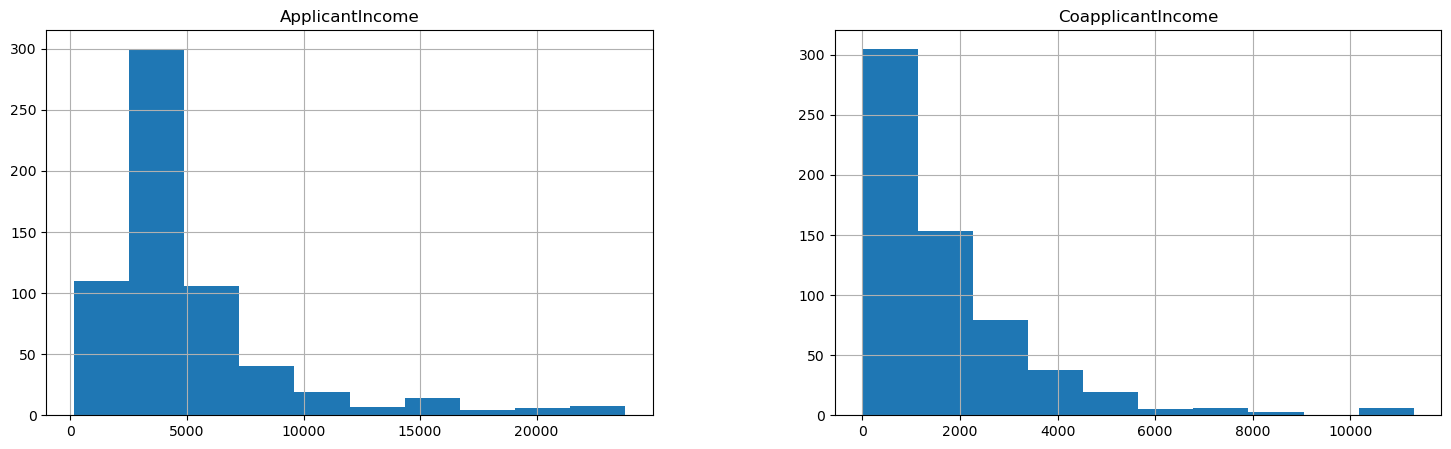

In [15]:
LoanData.hist(['ApplicantIncome', 'CoapplicantIncome'], figsize=(18,5))

**Missing values treatment**

Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

- Delete the missing value rows if there are only few records
- Impute the missing values with MEDIAN value for continuous variables
- Impute the missing values with MODE value for categorical variables
- Interpolate the values based on nearby values
- Interpolate the values based on business logic

In [16]:
# Finding how many missing values are there for each column
LoanData.isnull().sum()/LoanData.shape[0]*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Here, I am choosing to impute missing values using Median and Mode values

In [17]:
# Imputing the missing values
# Using MODE for categorical columns
LoanData['Gender'].fillna(LoanData['Gender'].mode()[0], inplace=True)
LoanData['Married'].fillna(LoanData['Married'].mode()[0], inplace=True)
LoanData['Dependents'].fillna(LoanData['Dependents'].mode()[0], inplace=True)
LoanData['Self_Employed'].fillna(LoanData['Self_Employed'].mode()[0], inplace=True)
# Using Mode value for Loan_Amount_Term since it is a categorical variable
LoanData['Loan_Amount_Term'].fillna(LoanData['Loan_Amount_Term'].mode()[0], inplace=True)
LoanData['Credit_History'].fillna(LoanData['Credit_History'].mode()[0], inplace=True)

# Using Median value for continuous columns
LoanData['LoanAmount'].fillna(LoanData['LoanAmount'].median(), inplace=True)

In [18]:
# Checking missing values again after the treatment
LoanData.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Feature Selection**

Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

**Visual exploration of relationship between variables**

- Continuous Vs Continuous ---- Scatter Plot
- Categorical Vs Continuous---- Box Plot
- Categorical Vs Categorical---- Grouped Bar Plots

In this case study the Target variable is categorical, hence below two scenarios will be present

- Categorical Target Variable Vs Continuous Predictor
- Categorical Target Variable Vs Categorical Predictor

**Relationship exploration: Categorical Vs Continuous -- Box Plots**

When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots

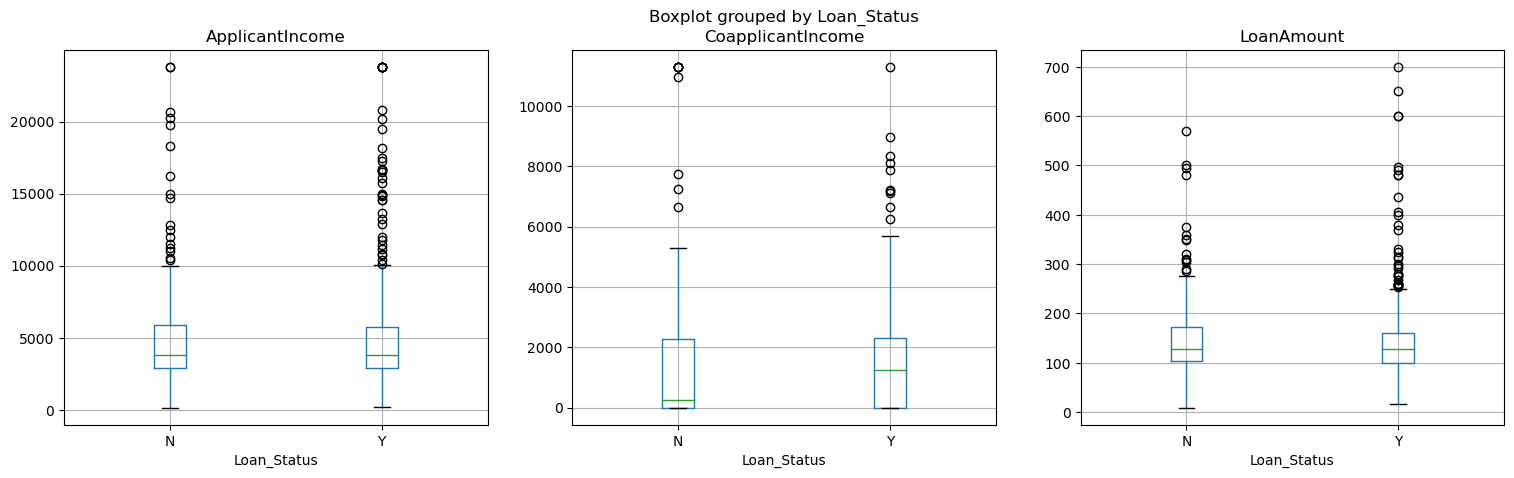

In [19]:
# Box plots for Categorical Target Variable "Loan_Status" and continuous predictors
ContinuousColsList=['ApplicantIncome','CoapplicantIncome', 'LoanAmount']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Loan_Status"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    LoanData.boxplot(column=PredictorCol, by='Loan_Status', figsize=(5,5), vert=True, ax=PlotCanvas[i])

#### Box-Plots interpretation**

**What should you look for in these box plots?**

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

For example, look at the first chart "ApplicantIncome" Vs "Loan_Status". The boxes are in the same line! It means that people whose loan was rejected and whose loan was approved have same kind of incomes. Hence, I cannot distinguish between approval and rejection based on the income of an applicant. So this column is NOT correlated with the Loan_Status.

The other two charts also exhibit same characteristics, hence all three continuous predictors are not correlated with the target variable.

**Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts**

When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots

In [20]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=LoanData['Gender'], columns=LoanData['Loan_Status'])
CrossTabResult

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


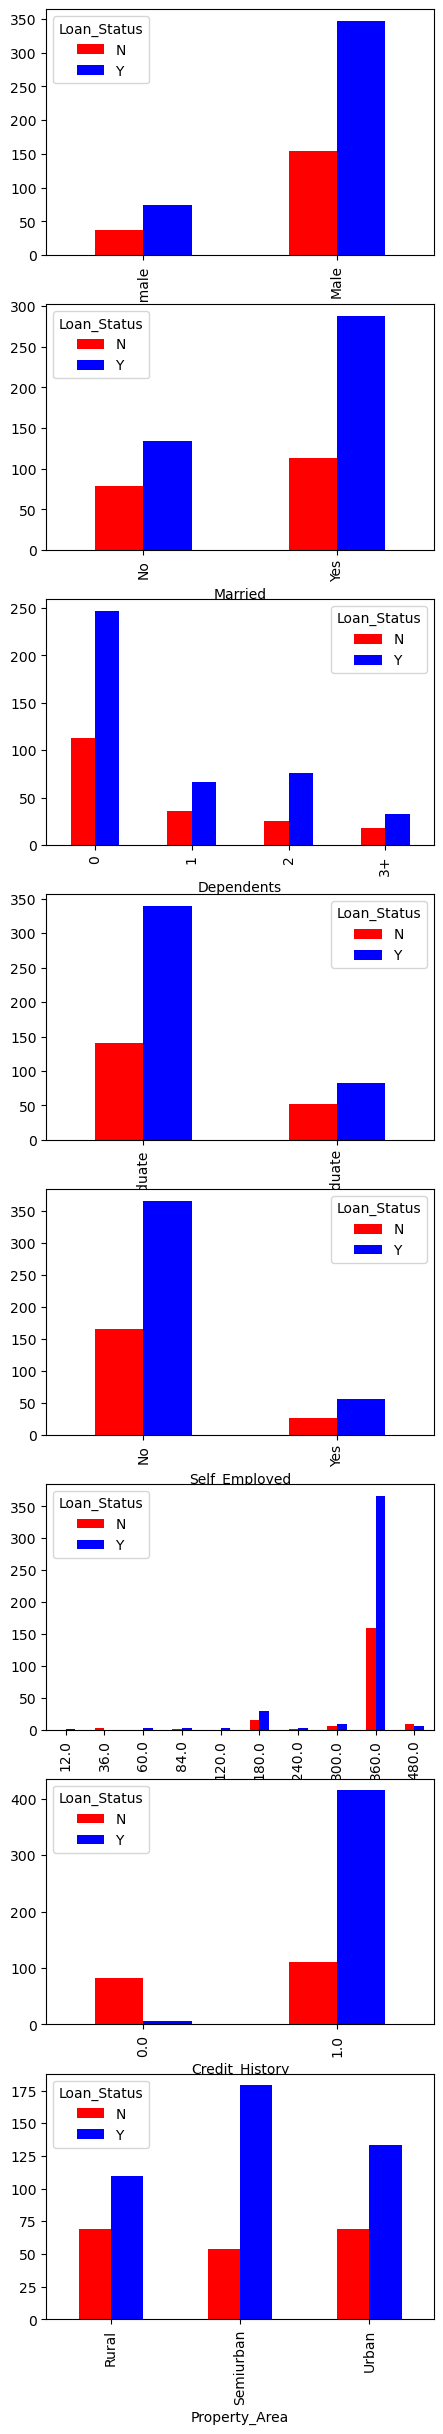

In [21]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(5,30))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Loan_Status"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=LoanData[CategoricalCol], columns=LoanData['Loan_Status'])
    CrossTabResult.plot.bar(color=['red','blue'], ax=PlotCanvas[i])

**Grouped Bar charts Interpretation**

- What to look for in these grouped bar charts?

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated. For example, look at the Gender Vs Loan_Status plot. The approved vs rejected ratio for Males is similar to Females, it means Gender does not affect the Loan approval!. Hence, these two variables are not correlated.

On the other hand, look at the Credit_History vs Loan_Status plot. 

The number of approvals are very high if Credit_History=1.0. It means Credit_History affects the loan approval! Hence, two columns are correlated with each other.

### Selecting final predictors for Machine Learning

Based on the above results, selecting the final columns for machine learning

In [22]:
SelectedColumns=['Married', 'Education', 'Credit_History', 'Property_Area']

# Selecting final columns
DataForML=LoanData[SelectedColumns]
DataForML.head()

,Married,Education,Credit_History,Property_Area
0,No,Graduate,1.0,Urban
1,Yes,Graduate,1.0,Rural
2,Yes,Graduate,1.0,Urban
3,Yes,Not Graduate,1.0,Urban
4,No,Graduate,1.0,Urban


In [23]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

#### Data Pre-processing for Machine Learning

**List of steps performed on predictor variables before data can be used for machine learning**

- Converting each Ordinal Categorical columns to numeric
- Converting Binary nominal Categorical columns to numeric using 1/0 mapping
- Converting all other nominal categorical columns to numeric using pd.get_dummies()
= Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In this data there is no Ordinal categorical variable.

**Converting the binary nominal variable to numeric using 1/0 mapping**

In [24]:
# Treating the binary nominal variables first
DataForML['Married'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,Married,Education,Credit_History,Property_Area
0,0,1,1.0,Urban
1,1,1,1.0,Rural
2,1,1,1.0,Urban
3,1,0,1.0,Urban
4,0,1,1.0,Urban


**Converting the nominal variable to numeric using get_dummies()**

In [25]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Loan_Status']=LoanData['Loan_Status']

# Printing sample rows
DataForML_Numeric.head()

,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0,1,1.0,False,False,True,Y
1,1,1,1.0,True,False,False,N
2,1,1,1.0,False,False,True,Y
3,1,0,1.0,False,False,True,Y
4,0,1,1.0,False,False,True,Y


#### Machine Learning: Splitting the data into Training and Testing sample

We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. 

This is known as Testing Data and the remaining data is called Training data on which the model is built. 

Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [26]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

In [27]:
# Separate Target Variable and Predictor Variables
TargetVariable='Loan_Status'
Predictors=['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

**Standardization/Normalization of data**

You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

In [28]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429, 6)
(429,)
(185, 6)
(185,)


#### Logistic Regression

In [30]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


#### Random Forest

RandomForestClassifier(max_depth=2)
              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


<Axes: >

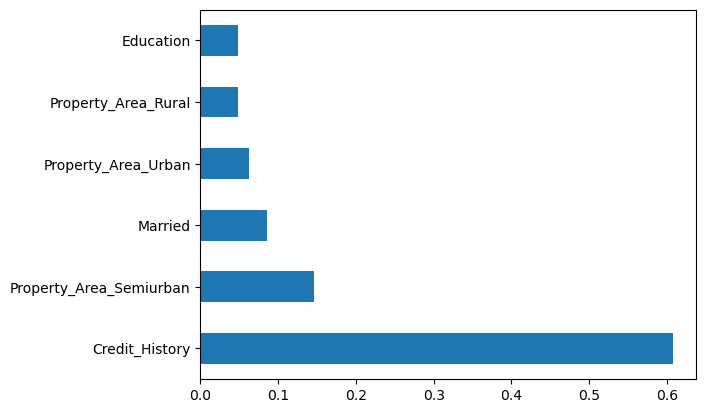

In [31]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

#### AdaBoost

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=500)
              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


<Axes: >

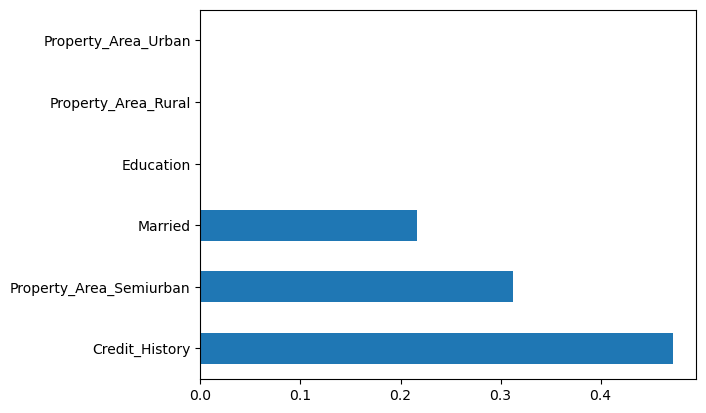

In [33]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

#### Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing Adaboost as the final model since it is very fast and I observe that it is using the predictors better by looking at its variable importance chart. It is not letting a single predictor dominate the decision, which is good.

In order to deploy the model we follow below steps

- Train the model using 100% data available
- Save the model as a serialized file which can be stored anywhere
- Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

**Step 1. Retraining the model using 100% data**

In [34]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Using the Adaboost algorithm with final hyperparamters
# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, estimator=DTC ,learning_rate=0.01)

# Training the model on 100% Data available
FinalAdaboostModel=clf.fit(X,y)

**Step 2. Save the model as a serialized file which can be stored anywhere**

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('FinalAdaboostModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalAdaboostModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

**Step 3. Create a python function**

In [ ]:
# This Function can be called from any from any front end tool/website
def PredictLoanStatus(InputLoanDetails):
    import pandas as pd
    Num_Inputs=InputLoanDetails.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputLoanDetails=pd.concat([InputLoanDetails,DataForML])
    
    # Treating the binary nominal variables first
    InputLoanDetails['Married'].replace({'Yes':1, 'No':0}, inplace=True)
    InputLoanDetails['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputLoanDetails=pd.get_dummies(InputLoanDetails)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']
    
    # Generating the input values to the model
    X=InputLoanDetails[Predictors].values[0:Num_Inputs]    
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalAdaboostModel.pkl', 'rb') as fileReadStream:
        AdaBoost_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=AdaBoost_model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [ ]:
# Calling the function for some loan applications
NewLoanApplications=pd.DataFrame(
data=[['No','Graduate',1,'Urban'],
     ['No','Graduate',0,'Urban']],
columns=['Married','Education','Credit_History','Property_Area'])

print(NewLoanApplications)

# Calling the Function for prediction
PredictLoanStatus(InputLoanDetails= NewLoanApplications)

The Function PredictLoanStatus can be used to produce the predictions for one or more loan applications at a time. Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the loan applications available in the system.

#### Deploying a predictive model as an API

Django and flask are two popular ways to deploy predictive models as a web service
You can call your predictive models using a URL from any front end like tableau, java or angular js

In [35]:
import os
os.getcwd()

'C:\\Users\\nithyalakshmim\\PYTHON\\2024\\Webinar'

#### streamlit

In [ ]:
#http://192.168.127.182:8501/

Sample URL to call the API
Copy and paste below URL in the web browser
http://127.0.0.1:8080/get_loan_prediction?Married=Yes&Education=Graduate&CreditHistory=0.0&PropertyArea=Urban

In [ ]:
# type: streamlit run app.py in the prompt cell